#WELCOME to the Multiple Linear Regression Project - Predicting Rent Prices

The Datasets that will be used are the following 
https://github.com/Codecademy/datasets/tree/master/streeteasy

These were made available by the StreetEasy Data Science Team https://streeteasy.com/ and include data from the rentals section https://streeteasy.com/for-rent/manhattan - To get a peak on how the website works you can check some Manhattan rentals in that link 

Lets first import everything we will need to run our multiple linear regression model

We will need:

Pandas for data manipulation and analysis

From Scikit Learn import Train_Test_split to train and split our data

From Scikit Learn import the Linear Regression Model

Matplotlib to plot the graphs

Seaborn to plot graphs and key visualizations as well

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew #to check for skewness 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
#Just in case we want some warning from warnings.warn to not appear in our results
import warnings
warnings.filterwarnings('ignore')

Now we Read in the raw data from the following URL and convert it into a data frame to be able to manipulate it
https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')
df = pd.DataFrame(data)
#Lets get a sense of the data to find out how many rows and columns it has
df.shape

(5000, 20)

In [39]:
#Now lets see the first 10 rows of the data frame using pandas
df.head(10)

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
5,2869,8967298,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,North Brooklyn,Brooklyn
6,10524,60898078,1950,1.0,1,950,1,3.0,83,0,0,0,0,0,0,0,0,Forest Hills,Central Queens,Queens
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan
8,5465,73060494,3500,1.0,1,996,9,7.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
9,10817,64726877,3800,3.0,2,1100,3,5.0,101,0,0,0,0,0,0,0,0,Central Harlem,All Upper Manhattan,Manhattan


In [40]:
#Get some key values like mean, std, min, max and quartiles 
#note that some variables are not taken into account when analyazing these key stats for obvious reasons like
#ids and binary (1 or 0) yes or no variables

df.describe()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11349.000000,9.998721e+07,20000.000000,5.000000,5.000000,4800.000000,51.000000,83.000000,180.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The standard deviation for the rent price is quite high, lets check the median and the skewness

In [41]:
df['rent'].median()

3600.0

In [42]:
df['rent'].skew()

2.268811511000172

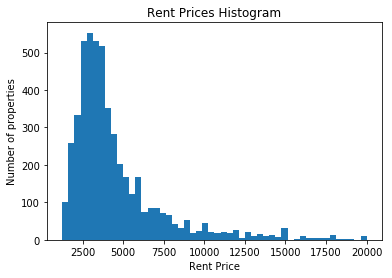

In [43]:
plt.hist(df['rent'], bins=50)
plt.title('Rent Prices Histogram')
plt.xlabel('Rent Price')
plt.ylabel('Number of properties')
plt.show()

There seems to be a high concentration of properties with a lower rent price as the data is right skewed. This will impact the overall precision of the regression model as our predicted values will be less accurate due to the lack of properties with a higher rent price in our data set.

One way to correct this is to clean the data set and focus on properties with a lower rent price. For this specific project we will not do that and build our multiple regression model with the complete data set as it is right now.

Lets do one more important step and create a Correlation Matrix which will measure the Linear Relationships between variables

-1 = Strong negative correlation. 1 = Strong positive correlation. 0 = No correlation

We do this by using the corr function from pandas and plotting a heatmap using seaborn

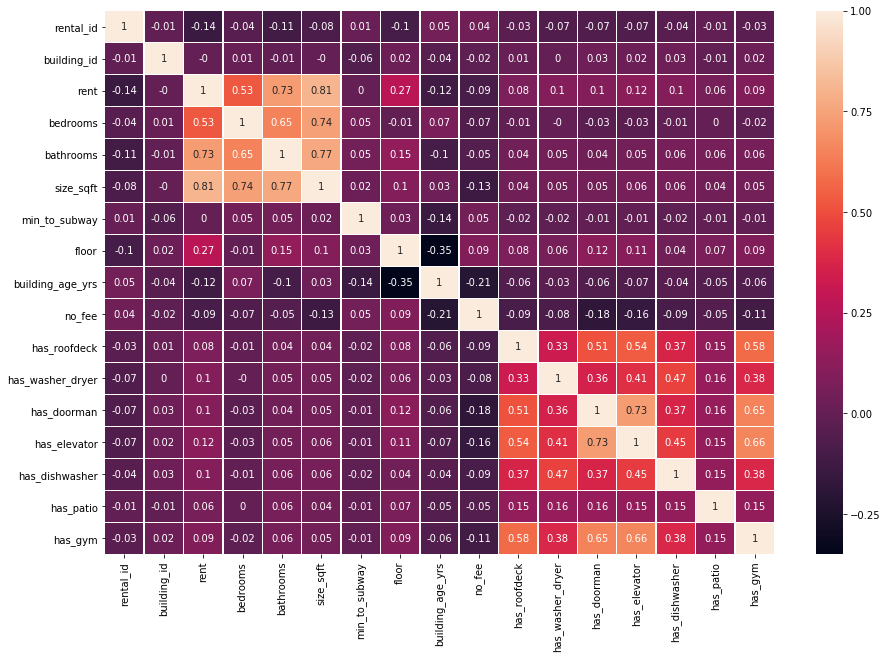

In [44]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)

For our model we want to select the variables that have a high correlation with our target variable = rent.

Rent has a high correlation with size_sqft (0.81) and bathrooms (0.73)

Please note this is measuring linear correlation meaning binary (1 or 0) variables will not display a high correlation with the rent price through this heatmap, even though some of them may be accurate in predicting a variation in it.

The heatmap can also be used to explain co-linearity, meaning how closely related are the independent variables to each other. We want to reduce the dimensionality of our data set to train our model and should therefore not include independent variables that are closely related to each other. For example has_doorman and has_elevator (0.73) here we would choose one or the other, also we can see that the size_sqft, bathroom and bedrooms are all highly correlated between each other.

When training and validating the accuracy of this model we will use all 14 relevant variables (shown below), once we obtain the results we will optimize the model by selecting the most appropriate variables based on the results obtained and this correlation heatmap. 

Please note we are not excluding any relevant variables because there are several binary ones (for which we have to test if they are accurate predictors for the variation in rent price or not) and for the purpose of later showing how to optimize the model based on the results obtained.

A further explanation will be given below. What we want to achieve is a high accuracy in our prediction with the lowest number of variables possible to avoid overfitting.

In [45]:
x = df[['bedrooms','bathrooms','size_sqft','min_to_subway','floor', 'building_age_yrs','no_fee',
        'has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']]
y = df[['rent']]

Now we divide the data into the training set and the test set, we will use 80% of the data for training and 20% for testing

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

Now lets check the shape of our new data frames to be sure they are indeeed divided in 80% train and 20% test data

In [47]:
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape) 

(4000, 14) (1000, 14)
(4000, 1) (1000, 1)


Now lets create the Multiple Regression Model

In [48]:
#Using Scikit Learn is done the same way as using a linear regression model
multipleregr = LinearRegression()

#Now we fit our X train set and our Y train set (80% of our data)
multipleregr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now we use the model to predict our dependent variable = rent
This is done using x_test which includes 20% of our data

In [49]:
y_predict = multipleregr.predict(x_test)

Okay lets put the model into action! We will use the following listing https://streeteasy.com/rental/2177438 to try out our model prediction

In [50]:
#This data frame contains the 14 different variables we used to train and test our model in the exact same order

#Incluiding bedrooms, bathrooms, size_sqft, min_to_subway, floor, building_age_yrs, no_fee,
#has_roofdeck, has_washer_dryer, has_doorman, has_elevator, has_dishwasher, has_patio, has_gym

apartment_listing_1 = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 0, 1, 0]]


#Lets predict the rent price
predict = multipleregr.predict(apartment_listing_1)

#And print it out
print('Predicted rent: $%.2f' % predict)

Predicted rent: $2249.72


###Awesome! The price of the listing is 2.000 dollars and our predicted model got 2249.72 dollars!

Time for some visualization

We will create a scatterplot with the prices on the X axis and the predicted prices on the Y axis
X axis = includes y_test (meaning the test data)
Y axis = includes y_predict (meaning our predicted values)

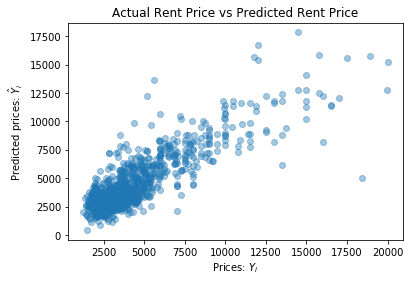

In [51]:
plt.scatter(y_test, y_predict, alpha=0.4)

plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices: $\hat{Y}_i$')
plt.title('Actual Rent Price vs Predicted Rent Price')
plt.show()

Lets now move onto tunning and evaluating the model

We know that the equation for a Multiple Linear Regression is 

y = b + m1x1 + m2x2 + mnxn...

mnxn = to any number of independent variables that our model will use

m1, m2, mn = the coefficients, These are used to determined which independent variables carries more weight

b = the intercept

To be clear when we ran on (input 58)

model = mlr.fit(x_train, y_train)

x_train contains the coefficients and y_train contains the intercept

In [52]:
#Lets print out the coefficients

print(multipleregr.coef_)

[[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]


Lets bring the list of our independent variables so we can more clearly visualize it


###(bedrooms, bathrooms, size_sqft, min_to_subway, floor, 

###building_age_yrs, no_fee, has_roofdeck, has_washer_dryer, has_doorman, 

###has_elevator, has_dishwasher, has_patio, has_gym)


The # bedrooms, # bathrooms, if the apartment has_washer_dryer and if the building has an elevator seem to be the variables carrying more weight. Now what about size_sqft we know as a fact the size in square feet of a property is directly related to its price, the low coefficient score shown above seems to be due to the SCALE of the variable in relation to the other variables and not due to the fact that it is actually not an important variable. (We will check if this is indeed true by plotting a scatterplot to check for its correlation with the rent price down below 

This is quite interesting when we want to compare rental property prices for example between boroughs. 

If we ran the same analysis comparing Datasets of Manhattan vs Queens and Brooklyn we would see a much much higher degree of Negative correlation between (has_doorman) if the building has a doorman or not and the price of the property for Manhattan.  (Please note this analysis is not included in this document).

What does this mean? Well that people looking to rent in Manhattan value having a doorman much more than people looking to rent in either Queens or Brooklyn. But this of course should come as no surprise and was just to explain the kind of analysis we could do by looking at the coefficient weights and also performing different feature selection techniques which we will do in the second part of this project.

###Now how can this be useful for a real estate agency or an individual broker? They would be able to see which factors impact the value for a rental property the most and then focus on offering properties with such factors first. Instead of guiding renters to other properties with less relevant features.

This kind of analysis becomes even more interesting and complex when correlating the weights of each coefficient with demographic variables. 

So a business question coming from a real estate agency could be:

###What is the most efficient way of showing properties to a home renter both to maximize profit and to reduce the time spent looking for a new property?

Lets plot a simple scatterplot to see the linear correlation between Rent Price and size in square feet

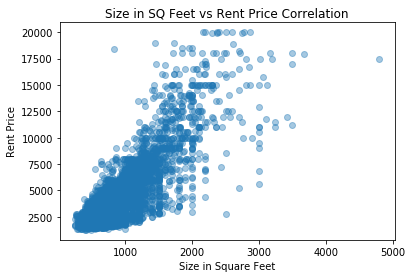

In [53]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel('Size in Square Feet')
plt.ylabel('Rent Price')
plt.title('Size in SQ Feet vs Rent Price Correlation')
plt.show()

Now lets use Residual Analysis which is one technique to evaluate the accuracy of a multiple linear regression model

e = y - ŷ (The residual e = difference between the actual value y and the predicted value ŷ) in other words Residual = Observed - Predicted

In our project y = actual rent and ŷ = predicted rent. We want ŷ to be as close as posible to the real rent value = y

And so we need to find out R² which is the coefficient of determination of the prediction

The formula is as follows: 1 - (u / v )

Where u = residual sum of squares and v = total sum of squares

The total sum of squares will tell us how much variation there is in the y variable

R² will tell us the percentage variation in y explained by all the x variables together

Lets give a clear example. If we want to predict Rent Price based on the number of bedrooms and number of bathrooms any given property has. 

###If we get a R²  value of 0.80 that would mean that all the x variables used (number of bathrooms and number of bedrooms) together explain 80% of the variation in y = Rent Price

In [54]:
#Lets find the mean squared error regression loss for our training set
print("Train score:")
print(multipleregr.score(x_train, y_train))

Train score:
0.7349688159822418


In [55]:
#Now the mean squared error regression loss for our testing set
print("Test score:")
print(multipleregr.score(x_test, y_test))

Test score:
0.7158565217228287


This means the variables we chose explain around 71% for the variation in the rent price of properties

Now lets plot a scatter plot graph of predicted y values vs residual values

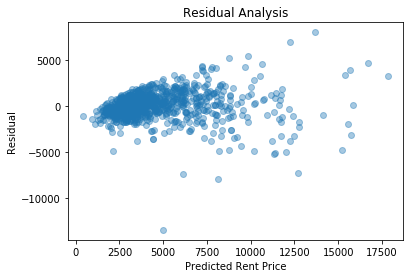

In [56]:
residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.xlabel('Predicted Rent Price')
plt.ylabel('Residual')
plt.title('Residual Analysis')
plt.show()

We can see that as the Predicted Rent Price increases the difference between the Observed and the Predicted values also increases = The residual increases. 

###In other words the model becomes more innaccurate on properties with a Higher Rent Price

##We will now try and improve the accuracy of our model by using 3 different feature selection techniques for machine learning. 

Please refer to the "Feature Selection Techniques For Machine Learning" Notebook, where we will explain each technique and use it to optimize the results for this Multiple Linear Regression Model